In [1]:
try:
    from google.colab import drive

    drive.mount('./drive/')

    %cd drive/My \ Drive/Text_Summarization

except:
    print("No Colab Environment")

No Colab Environment


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import yellowbrick
parameters = {'axes.labelsize': 25,
          'axes.titlesize': 64,
             'xtick.labelsize':32,
              'ytick.labelsize':32,
             "figure.figsize" : (20, 15)
             }


plt.rcParams.update(parameters)



/Users/adamgoldstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [3]:
#Load Main file with Classifications

df_overview = pd.read_csv("../Data/processed/Telehealth.csv")

# Modify NER Classification

In [4]:
df_ner = pd.read_json("../Data/processed/ibm_ner_analysis.json")
df_ner.head()

,NER_Label,Term,relevance,count,confidence,disambiguation,Document
0,Person,Bolton Dorstyn,0.953405,6,0.970710,None,0
1,HealthCondition,trauma depression,0.834730,8,0.994297,None,0
2,Person,Lazar,0.772091,5,0.999862,None,0
3,Person,Luxton Nelson,0.765374,3,0.927518,None,0
4,HealthCondition,symptom depression,0.681805,3,0.603748,None,0


In [5]:
df_ner_slim = df_ner[df_ner["confidence"] >= .70]

In [6]:
#Example Classification
df_ner_slim[df_ner_slim["Term"] == "Google"]

,NER_Label,Term,relevance,count,confidence,disambiguation,Document
167,Company,Google,0.058970,1,0.983820,"{'subtype': ['AcademicInstitution', 'AwardPres...",3
189,Company,Google,0.120358,1,0.977118,"{'subtype': ['AcademicInstitution', 'AwardPres...",4
849,Company,Google,0.253876,9,1.000000,"{'subtype': ['AcademicInstitution', 'AwardPres...",19
1094,Company,Google,0.033658,1,0.921756,"{'subtype': ['AcademicInstitution', 'AwardPres...",25
1643,Company,Google,0.194506,6,1.000000,"{'subtype': ['AcademicInstitution', 'AwardPres...",40
1660,Company,Google,0.305363,21,1.000000,"{'subtype': ['AcademicInstitution', 'AwardPres...",41


In [7]:
#Merge Document to main file to determine covid and pre-covid entities
entity_by_document_overview = df_ner_slim.merge(df_overview,left_on="Document",right_on=df_overview.index)

In [8]:
#Classification is the last column
entity_by_document_overview.head()

,NER_Label,Term,relevance,count,confidence,disambiguation,Document,Journal Title,Article Title,Date Published,...,Content,Content_Length,Abstract_Length,Parsed_Keywords,Parsed_Keywords_Length,Subfield,et_al_Count,Stopwords_Lemma_Longform_Clean_Content,Clean_Content,Classification
0,Person,Bolton Dorstyn,0.953405,6,0.970710,None,0,Psychological Services,The Effectiveness of Telepsychology With Veter...,2021,...,Veterans face a variety of stressors related t...,37477,2411,"['telepsychology,', 'meta-analysis,', 'veteran...",5,Clinical & Counseling Psychology,50,veteran face variety stressor relate military ...,veteran face variety stressor relate military ...,Covid
1,HealthCondition,trauma depression,0.834730,8,0.994297,None,0,Psychological Services,The Effectiveness of Telepsychology With Veter...,2021,...,Veterans face a variety of stressors related t...,37477,2411,"['telepsychology,', 'meta-analysis,', 'veteran...",5,Clinical & Counseling Psychology,50,veteran face variety stressor relate military ...,veteran face variety stressor relate military ...,Covid
2,Person,Lazar,0.772091,5,0.999862,None,0,Psychological Services,The Effectiveness of Telepsychology With Veter...,2021,...,Veterans face a variety of stressors related t...,37477,2411,"['telepsychology,', 'meta-analysis,', 'veteran...",5,Clinical & Counseling Psychology,50,veteran face variety stressor relate military ...,veteran face variety stressor relate military ...,Covid
3,Person,Luxton Nelson,0.765374,3,0.927518,None,0,Psychological Services,The Effectiveness of Telepsychology With Veter...,2021,...,Veterans face a variety of stressors related t...,37477,2411,"['telepsychology,', 'meta-analysis,', 'veteran...",5,Clinical & Counseling Psychology,50,veteran face variety stressor relate military ...,veteran face variety stressor relate military ...,Covid
4,Quantity,23%,0.595538,2,0.960000,None,0,Psychological Services,The Effectiveness of Telepsychology With Veter...,2021,...,Veterans face a variety of stressors related t...,37477,2411,"['telepsychology,', 'meta-analysis,', 'veteran...",5,Clinical & Counseling Psychology,50,veteran face variety stressor relate military ...,veteran face variety stressor relate military ...,Covid


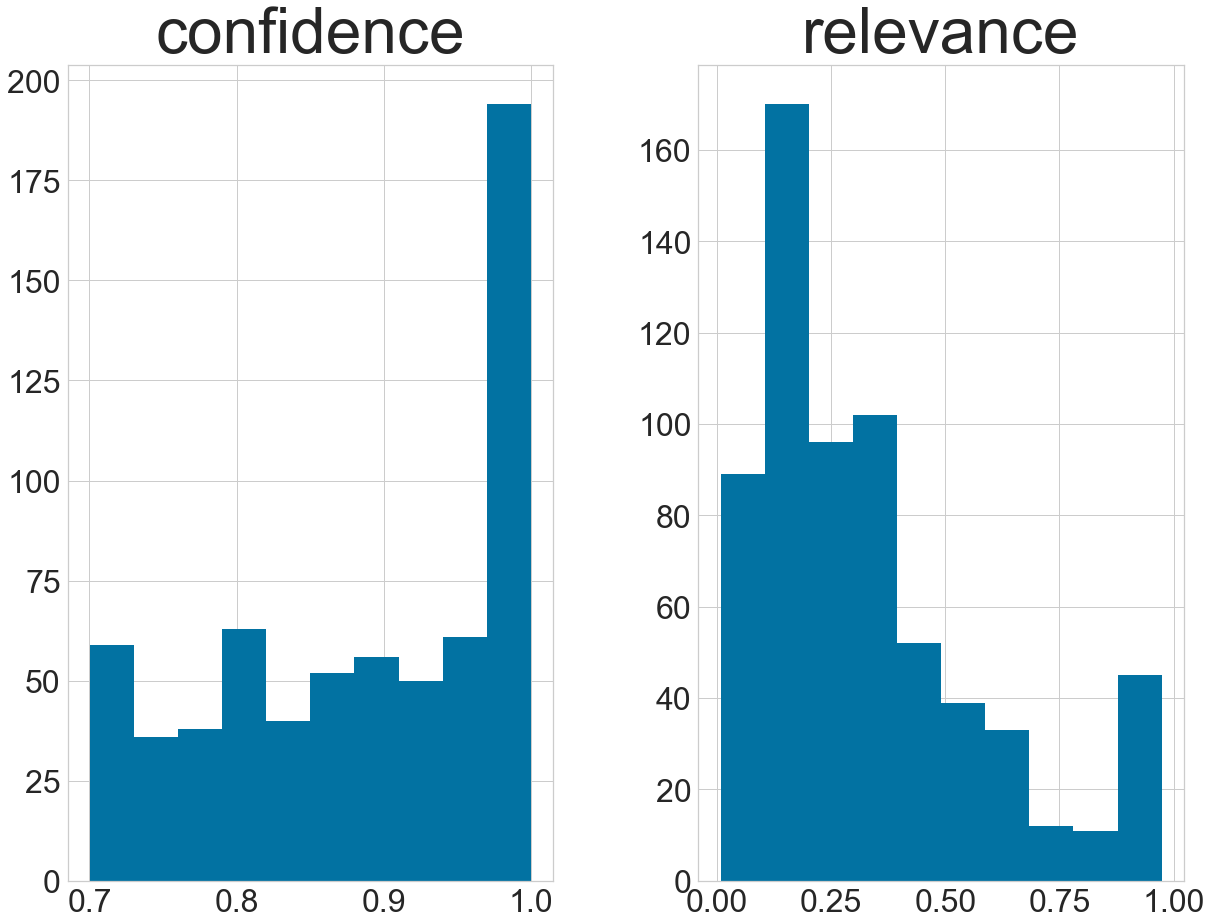

In [9]:
_ = entity_by_document_overview[["confidence","relevance"]].hist()

In [10]:
entity_by_document_overview["NER_Label"].unique()

array(['Person', 'HealthCondition', 'Quantity', 'Organization',
       'Location', 'Company', 'Sport'], dtype=object)

# Plot Overall Entities Labels

Text(0, 0.5, 'Frequency')

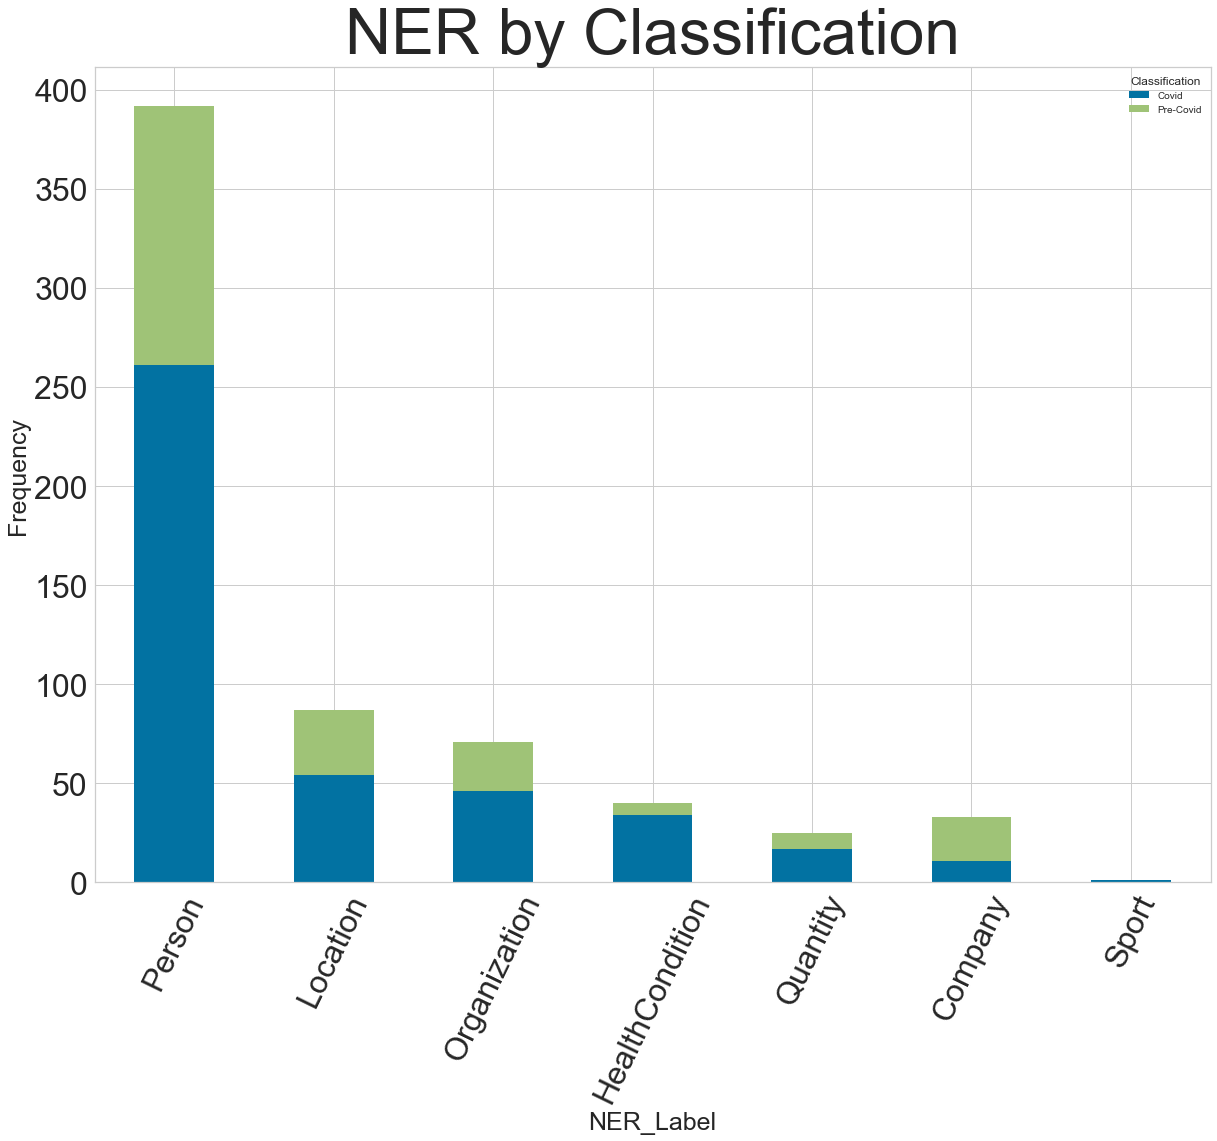

In [11]:
ner_overview_plot = (entity_by_document_overview.groupby(['Classification', 'NER_Label']).size().reset_index()
           .pivot(columns='Classification', index='NER_Label', values=0)
           .sort_values(by="Covid",ascending=False))

ax = ner_overview_plot.plot(kind='bar', stacked=True,title="NER by Classification")
_ = plt.xticks(rotation=64)

ax.set_ylabel("Frequency")

# Top Ten - Primary NER Classifications

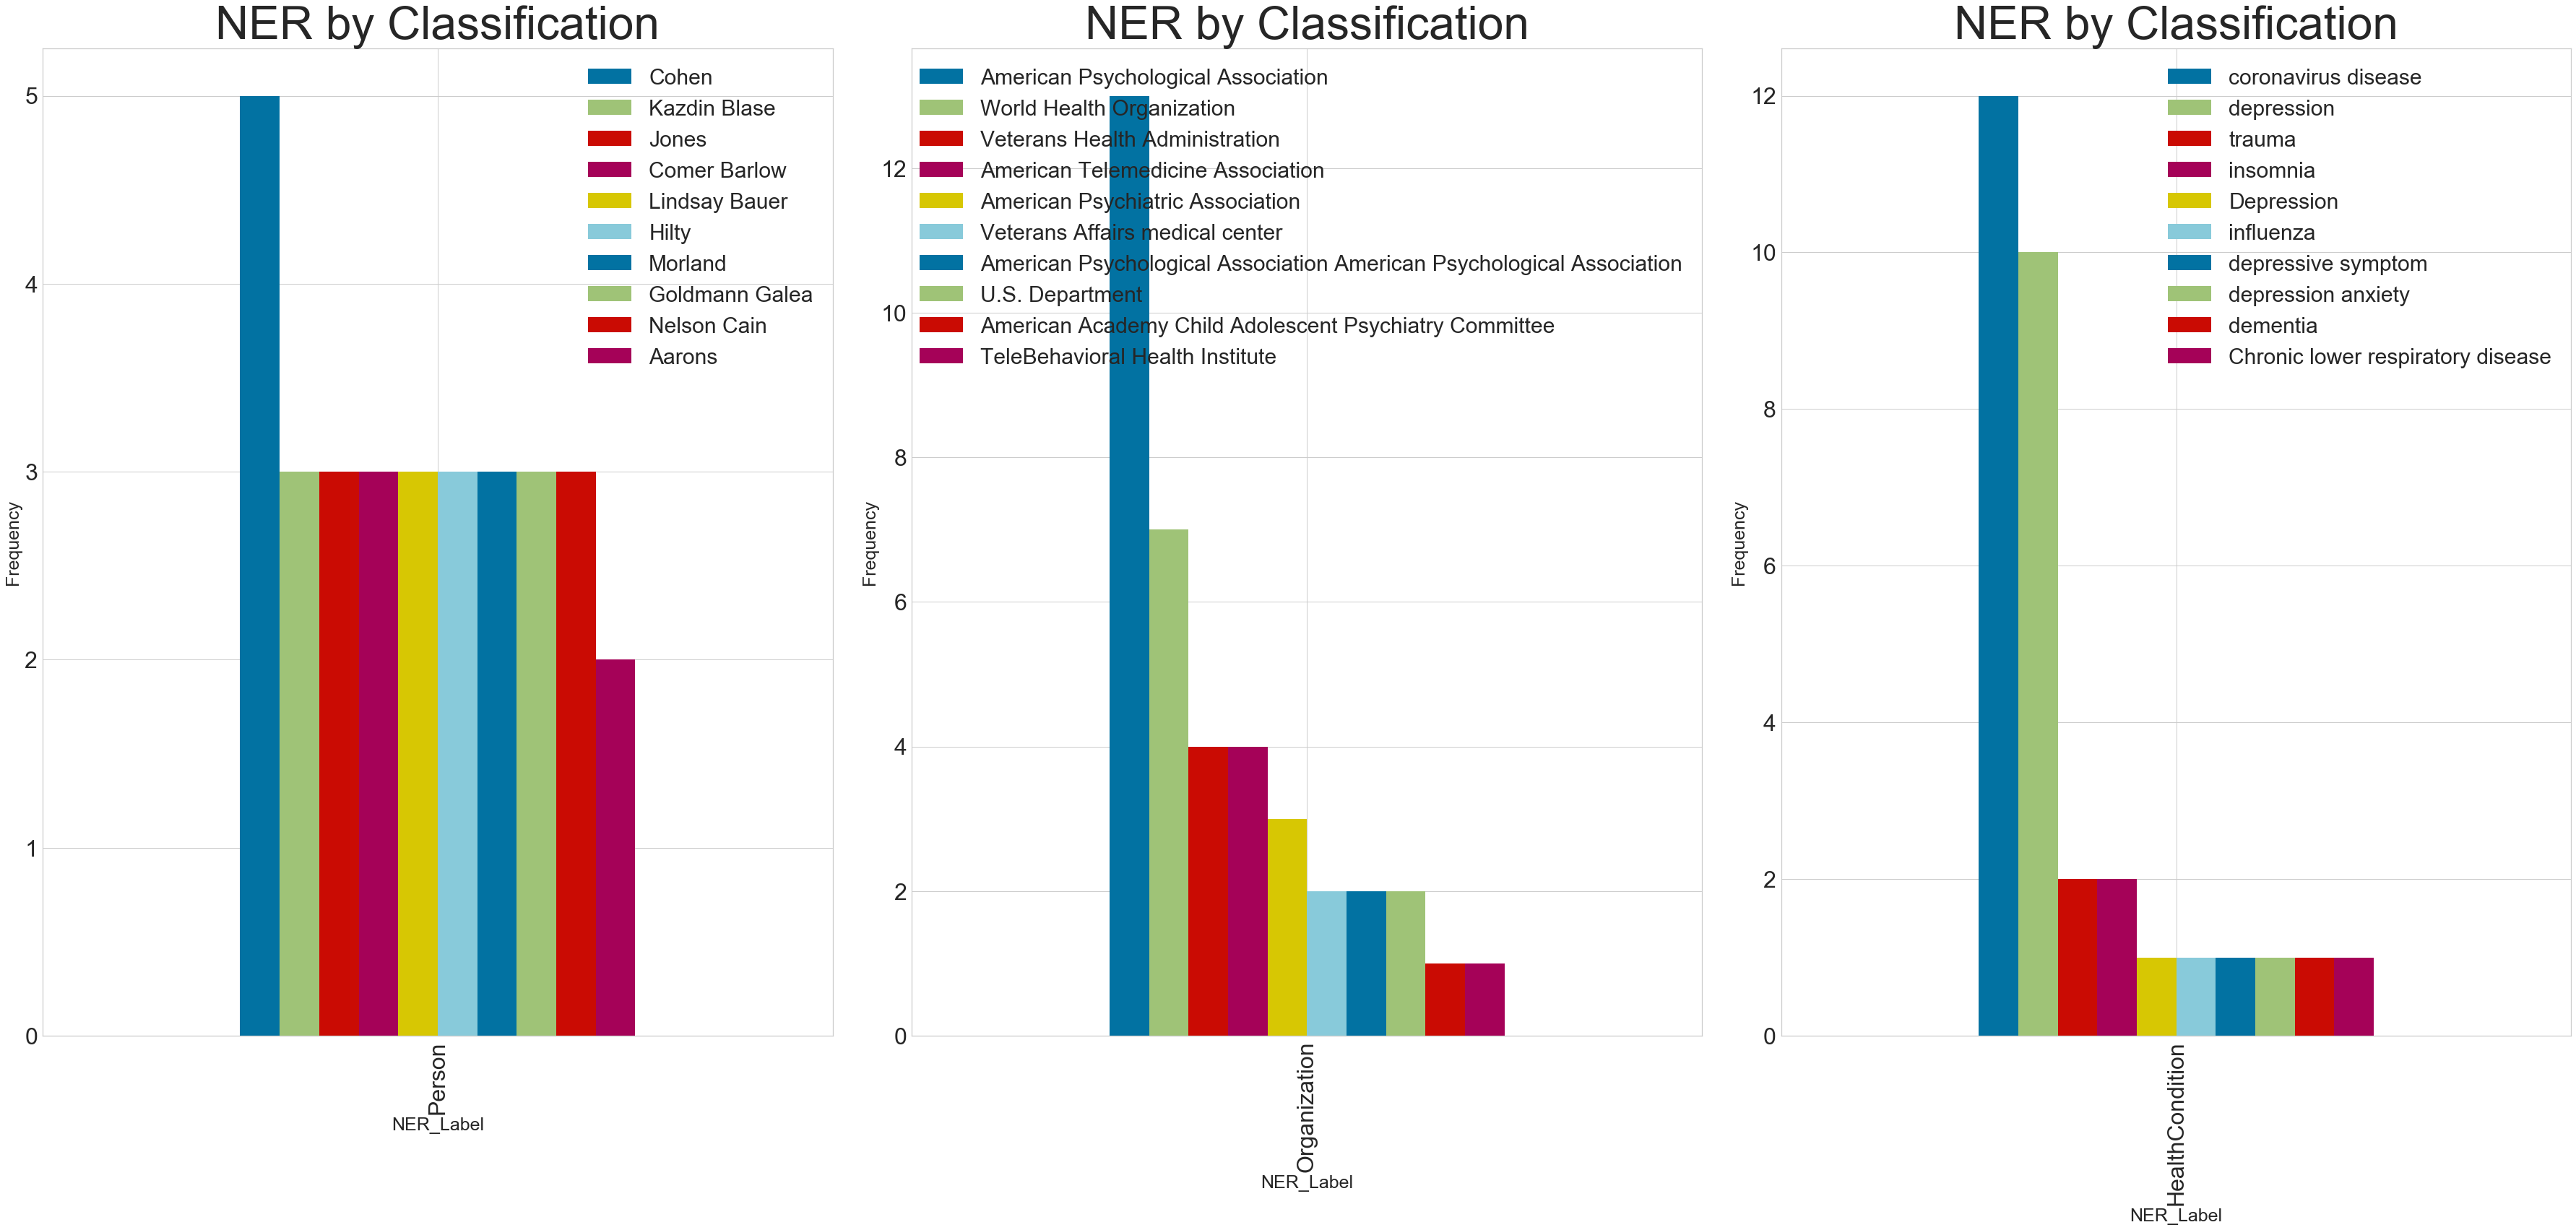

In [12]:
top = 10

visualize_cols = ["Person","Organization","HealthCondition"]

fig, ax = plt.subplots(1,len(visualize_cols),figsize=(50,20))
fig.tight_layout(h_pad=2,w_pad=3)

for index,col in enumerate(visualize_cols):

    dataset = entity_by_document_overview.query(f'NER_Label == "{col}"')

    ner_overview_plot = (dataset.groupby(['Term', 'NER_Label']).size().reset_index()
                         
                .pivot(columns='NER_Label', index='Term', values=0)
                         
                 .sort_values(by=col,ascending=False)
                 .head(top)
                         
                .T
                )
                

    ner_overview_plot.plot(kind='bar',title="NER by Classification",ax=ax[index]).legend(fontsize="30")
    
    ax[index].set_ylabel("Frequency")

# Top Ten - Primary NER Classifications

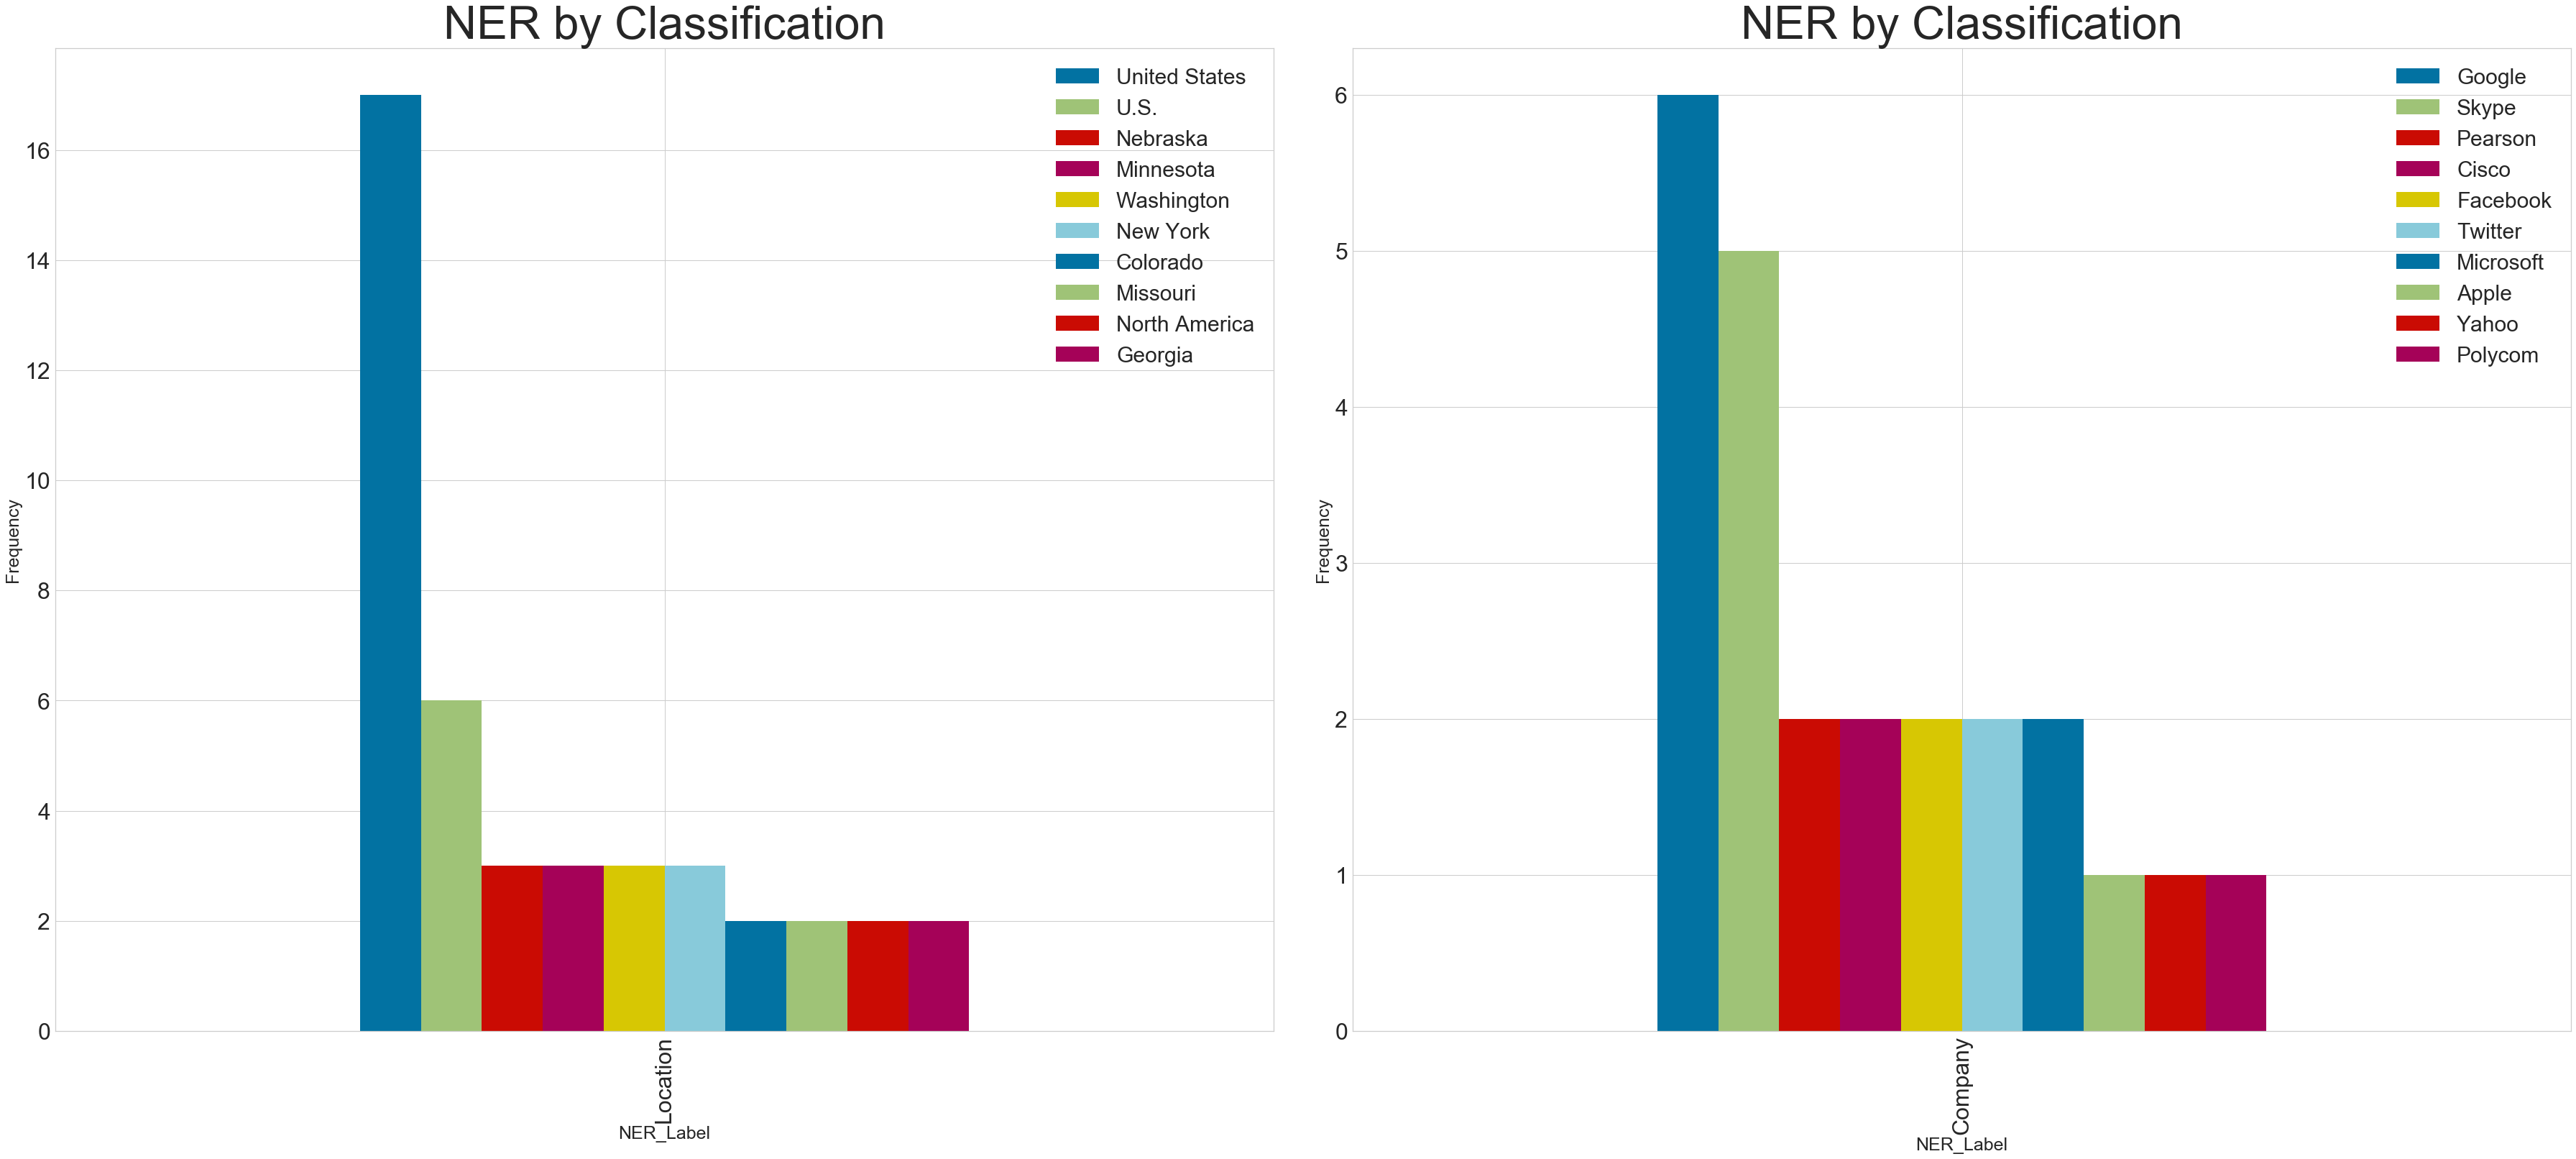

In [13]:
top = 10

visualize_cols = ["Location","Company"]

fig, ax = plt.subplots(1,len(visualize_cols),figsize=(50,20))
fig.tight_layout(h_pad=2,w_pad=3)

for index,col in enumerate(visualize_cols):

    dataset = entity_by_document_overview.query(f'NER_Label == "{col}"')

    ner_overview_plot = (dataset.groupby(['Term', 'NER_Label']).size().reset_index()
                         
                .pivot(columns='NER_Label', index='Term', values=0)
                         
                 .sort_values(by=col,ascending=False)
                 .head(top)
                         
                .T
                )
    
                

    ner_overview_plot.plot(kind='bar',title="NER by Classification",ax=ax[index]).legend(fontsize="30")
    ax[index].set_ylabel("Frequency")

# Filter datasets for comparison

In [14]:
entity_by_document_overview.head()

,NER_Label,Term,relevance,count,confidence,disambiguation,Document,Journal Title,Article Title,Date Published,...,Content,Content_Length,Abstract_Length,Parsed_Keywords,Parsed_Keywords_Length,Subfield,et_al_Count,Stopwords_Lemma_Longform_Clean_Content,Clean_Content,Classification
0,Person,Bolton Dorstyn,0.953405,6,0.970710,None,0,Psychological Services,The Effectiveness of Telepsychology With Veter...,2021,...,Veterans face a variety of stressors related t...,37477,2411,"['telepsychology,', 'meta-analysis,', 'veteran...",5,Clinical & Counseling Psychology,50,veteran face variety stressor relate military ...,veteran face variety stressor relate military ...,Covid
1,HealthCondition,trauma depression,0.834730,8,0.994297,None,0,Psychological Services,The Effectiveness of Telepsychology With Veter...,2021,...,Veterans face a variety of stressors related t...,37477,2411,"['telepsychology,', 'meta-analysis,', 'veteran...",5,Clinical & Counseling Psychology,50,veteran face variety stressor relate military ...,veteran face variety stressor relate military ...,Covid
2,Person,Lazar,0.772091,5,0.999862,None,0,Psychological Services,The Effectiveness of Telepsychology With Veter...,2021,...,Veterans face a variety of stressors related t...,37477,2411,"['telepsychology,', 'meta-analysis,', 'veteran...",5,Clinical & Counseling Psychology,50,veteran face variety stressor relate military ...,veteran face variety stressor relate military ...,Covid
3,Person,Luxton Nelson,0.765374,3,0.927518,None,0,Psychological Services,The Effectiveness of Telepsychology With Veter...,2021,...,Veterans face a variety of stressors related t...,37477,2411,"['telepsychology,', 'meta-analysis,', 'veteran...",5,Clinical & Counseling Psychology,50,veteran face variety stressor relate military ...,veteran face variety stressor relate military ...,Covid
4,Quantity,23%,0.595538,2,0.960000,None,0,Psychological Services,The Effectiveness of Telepsychology With Veter...,2021,...,Veterans face a variety of stressors related t...,37477,2411,"['telepsychology,', 'meta-analysis,', 'veteran...",5,Clinical & Counseling Psychology,50,veteran face variety stressor relate military ...,veteran face variety stressor relate military ...,Covid


In [15]:
#Create precovid dataset
pre_covid = (entity_by_document_overview
             .query('Classification == "Pre-Covid"'))


pre_covid_plot = (pre_covid[["NER_Label","Term","Document"]]
                  .groupby(["NER_Label","Term"])
                  .count()
                  .sort_values(by="Document",ascending=False)
                  .rename(columns={"Document":"Pre-Covid"})
                  .reset_index()
                 
                 
                 )

pre_covid_plot["Classification"] = "Pre-Covid"
pre_covid_plot.head()

,NER_Label,Term,Pre-Covid,Classification
0,Location,United States,5,Pre-Covid
1,Organization,American Psychological Association,5,Pre-Covid
2,HealthCondition,depression,4,Pre-Covid
3,Company,Skype,3,Pre-Covid
4,Location,U.S.,3,Pre-Covid


In [16]:
#Create covid dataset

covid = (entity_by_document_overview
              .query('Classification == "Covid"'))


covid_plot = (covid[["NER_Label","Term","Document"]]
                  .groupby(["NER_Label","Term"])
                  .count()
                  .sort_values(by="Document",ascending=False)
                  .rename(columns={"Document":"Covid"})
                  .reset_index()
                 
                 
                 )


covid_plot["Classification"] = "Covid"
covid_plot.head()

,NER_Label,Term,Covid,Classification
0,HealthCondition,coronavirus disease,12,Covid
1,Location,United States,12,Covid
2,Organization,American Psychological Association,8,Covid
3,HealthCondition,depression,6,Covid
4,Organization,World Health Organization,5,Covid


In [17]:
plot_by_time = pd.concat([covid_plot,pre_covid_plot]).fillna(0)

# NER ORG Comparison

In [18]:
#Creates the plots to compare the Classifications
import textwrap
def plot_compare(data,ner_kind,top=10):

    fig, ax = plt.subplots(2,1,figsize=(30,15),sharex=True)
    fig.tight_layout(h_pad=4,w_pad=10)

    plot_by_time = data.query(f'NER_Label == "{ner_kind}"')
    
    classifications = ["Pre-Covid","Covid"]

    for index,classification in enumerate(classifications):

        combine_plot = (plot_by_time.groupby("Term").sum() #Need to since terms can occur in both classifications

                        .sort_values(by=classification,ascending=False)

                        #.rename(columns={"Term":"Total_Count"})

                        #.drop(columns="Total_Count")

                        .head(top)

                        )

        (combine_plot.plot(kind="barh",stacked=True,title=f"{classification} - NER_Label - {ner_kind}",ax=ax[index]))
        
        ax[index].set_yticklabels([textwrap.fill(phrase, 64) for phrase in combine_plot.index])
        
        ax[index].set_xlabel("Frequency")
        
        ax[index].legend(fontsize=30)
        
        
        ax[index].invert_yaxis()
        
        

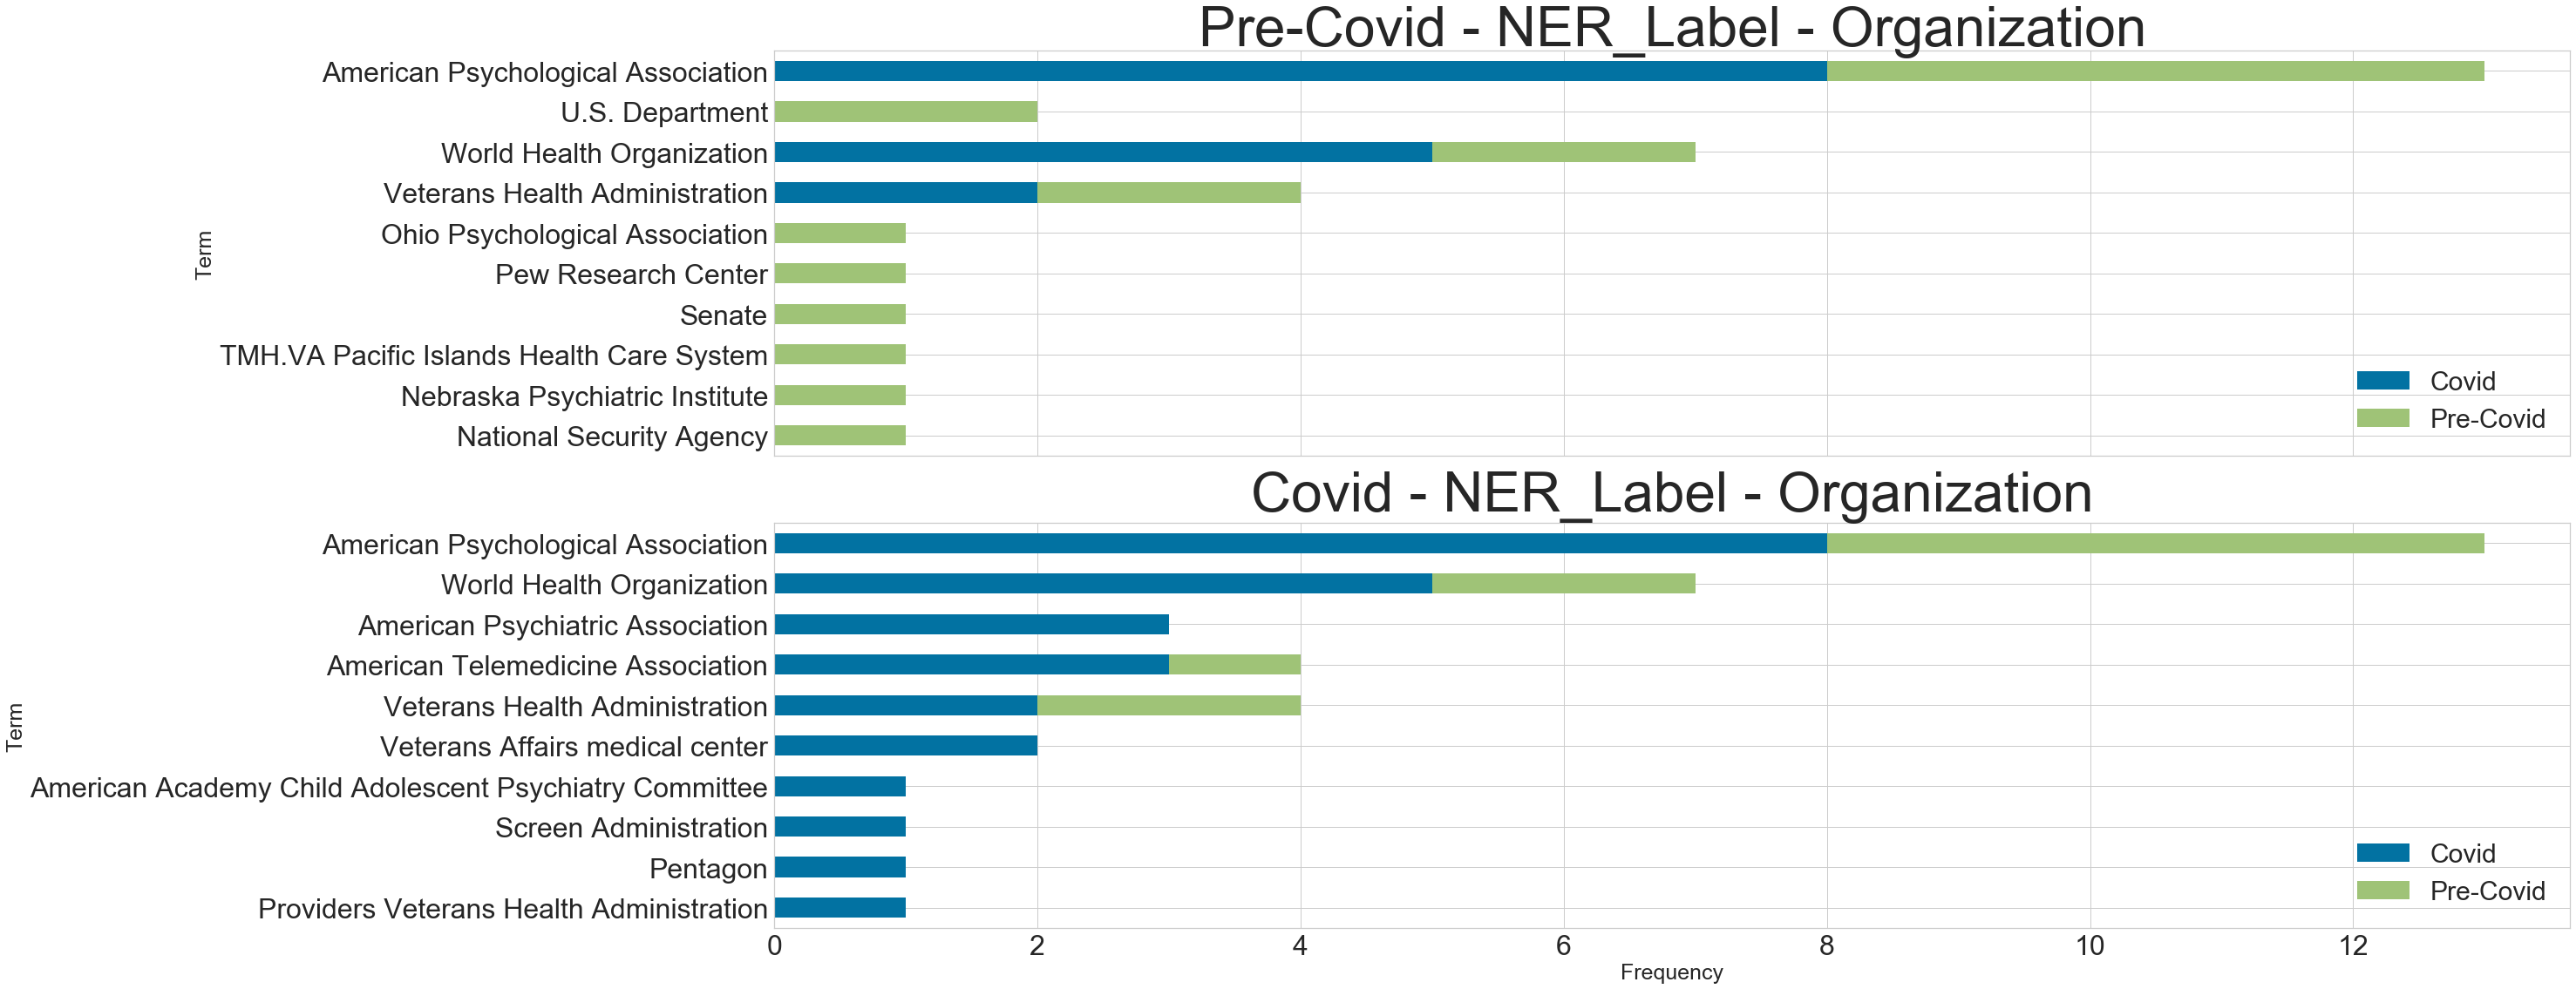

In [19]:
plot_compare(plot_by_time,"Organization")

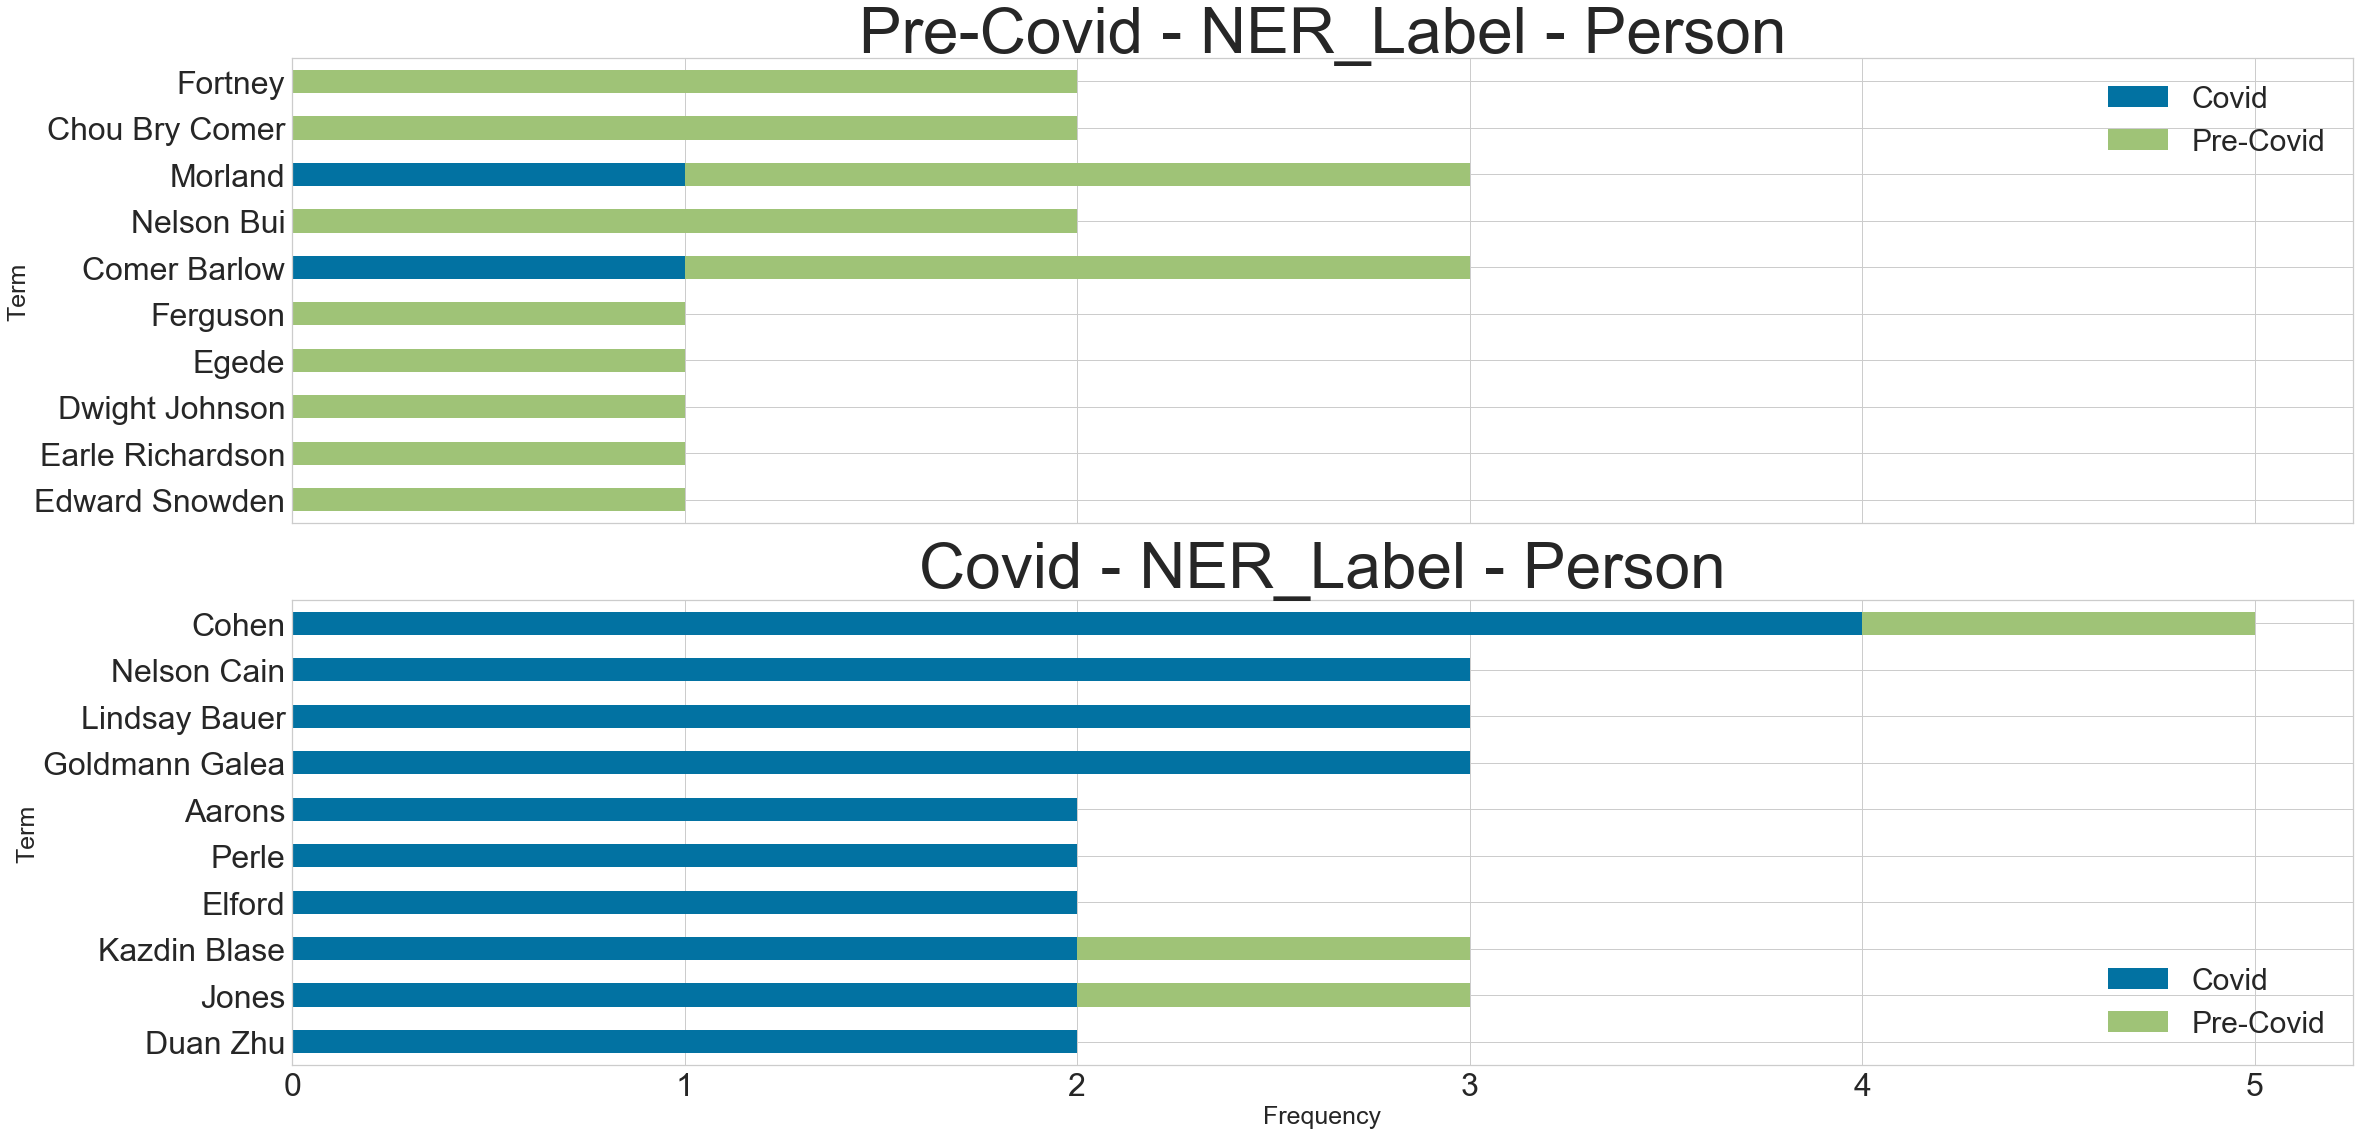

In [20]:
plot_compare(plot_by_time,"Person")

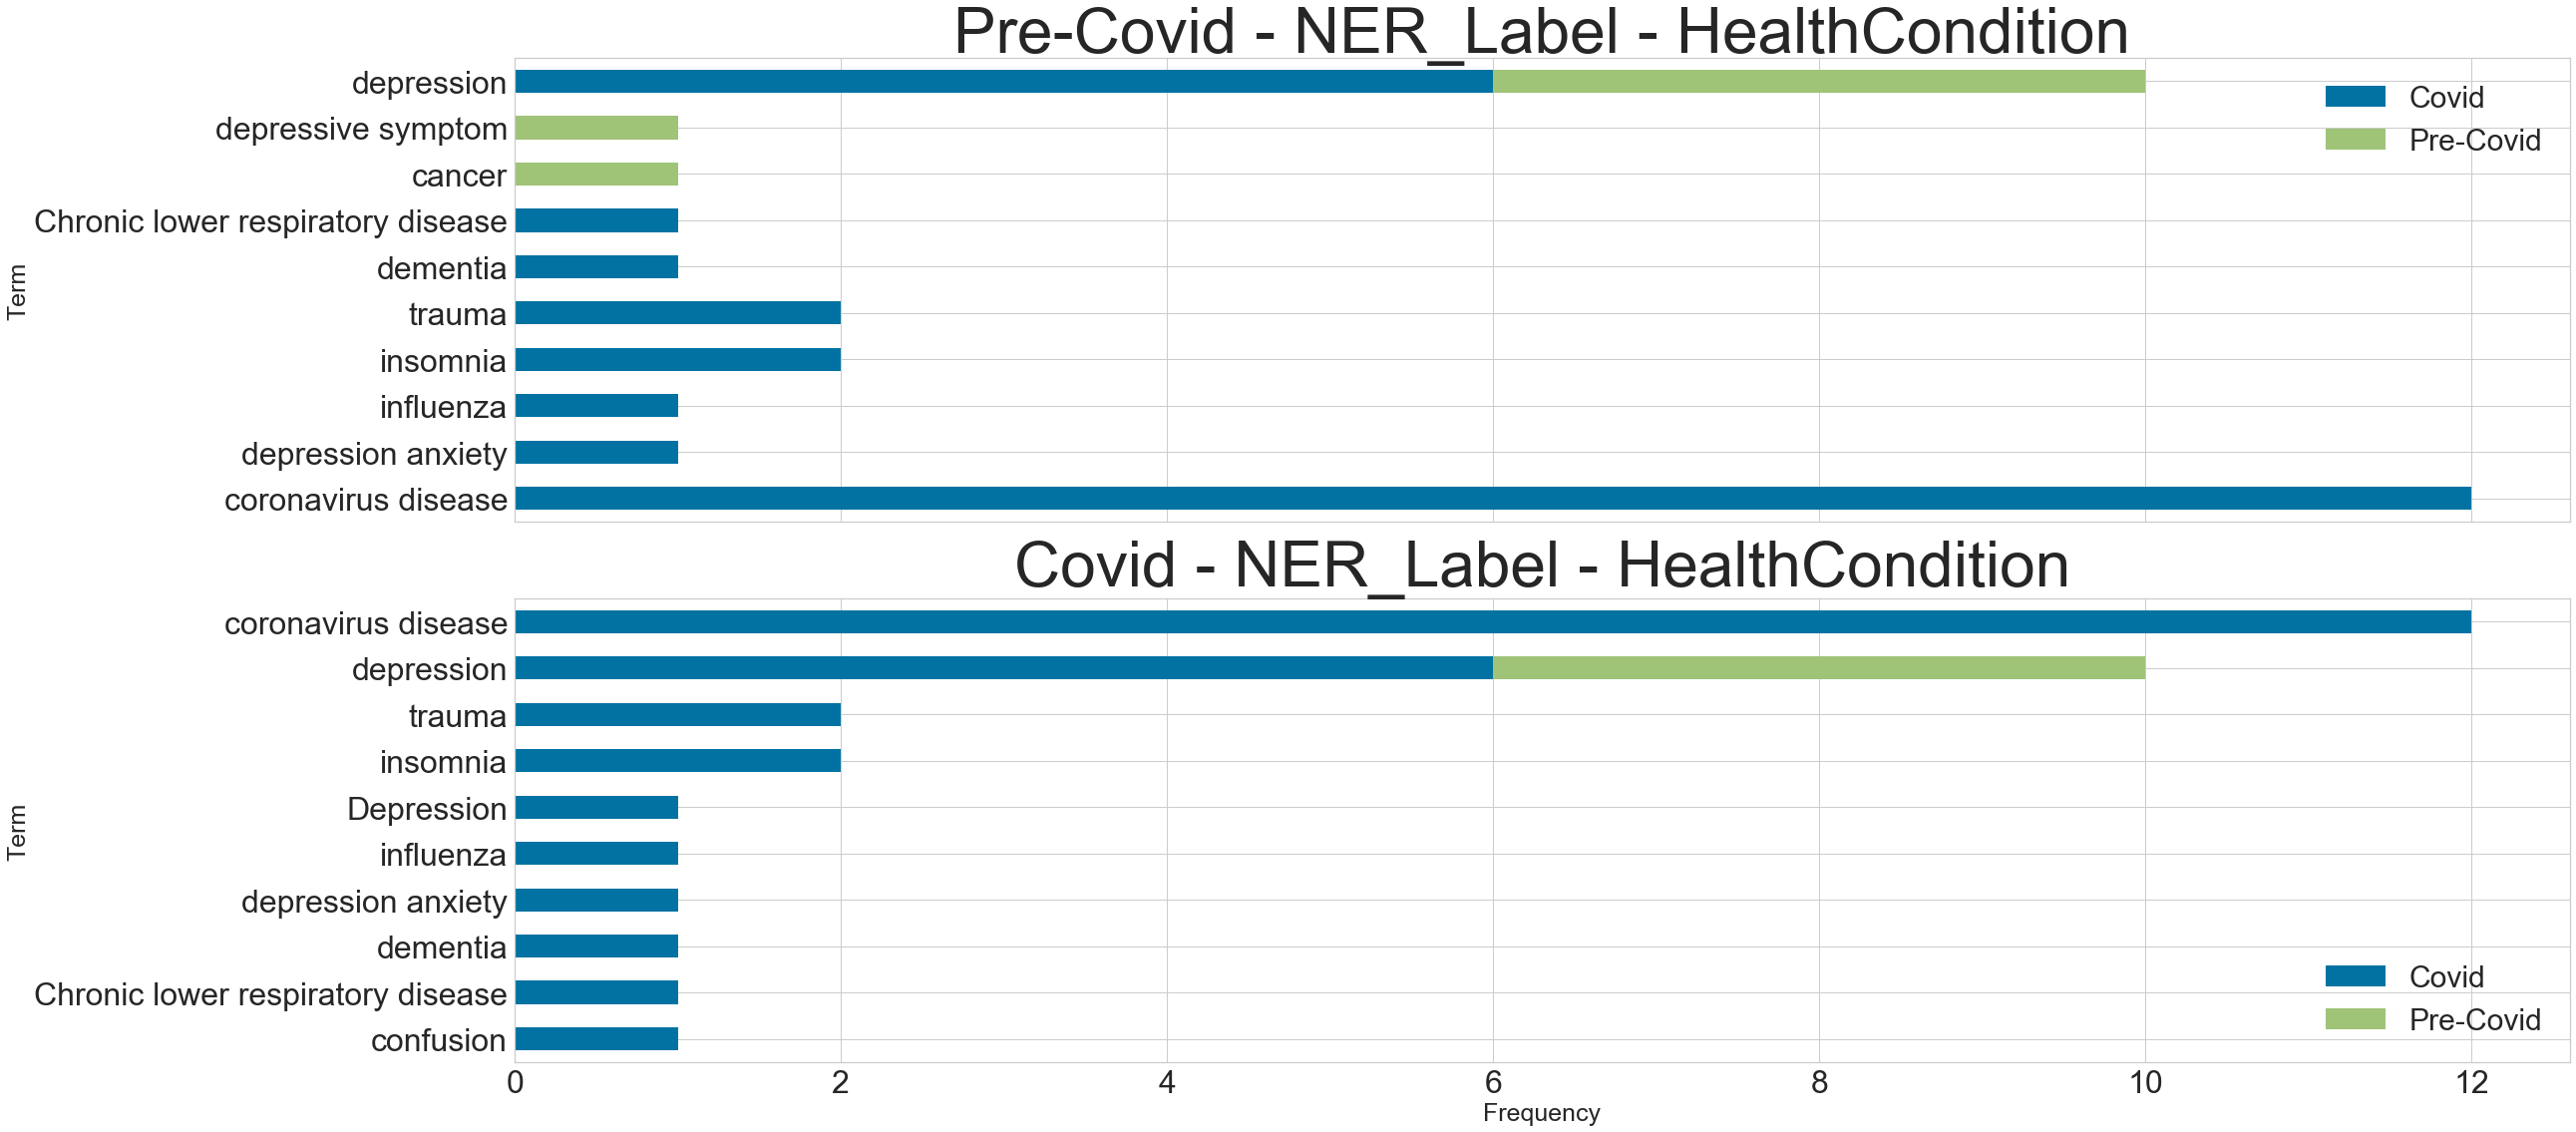

In [21]:
plot_compare(plot_by_time,"HealthCondition")

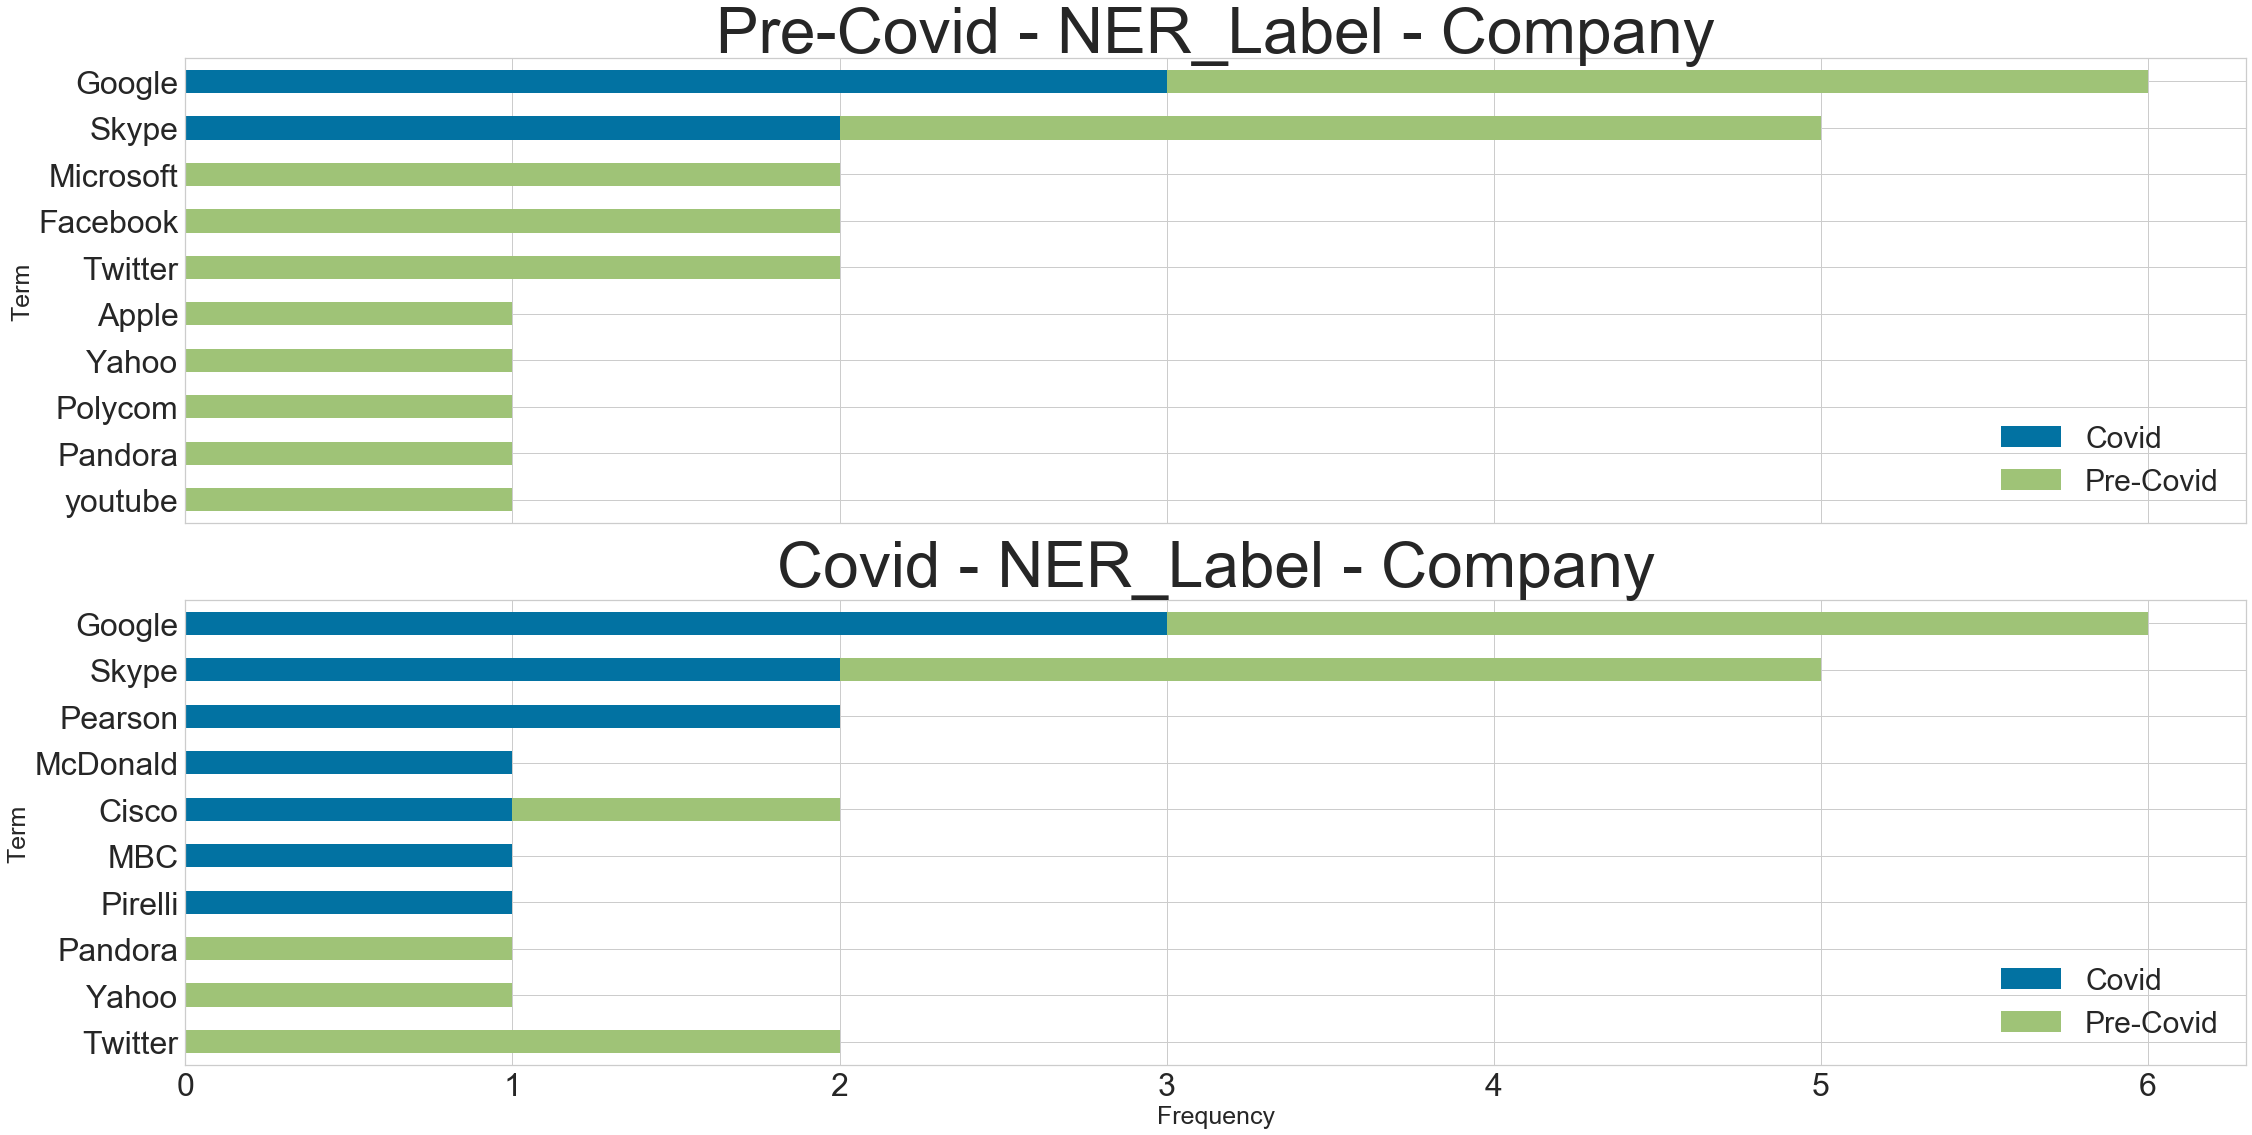

In [22]:
plot_compare(plot_by_time,"Company")